In [158]:
%reload_ext autoreload
%autoreload 2

from ETL import *;

In [159]:
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

In [160]:
import matplotlib.pyplot as plt

In [301]:
r_outer = 1185

In [302]:
bv_sections = {}
sensor_types = ['FBK_5fC', 'FBK_2.5fC', 'HPK_5fC', 'HPK_2.5fC']
for s in sensor_types:
    bv_sections[s] = []
    #r = 5000
    r = r_outer
    while r>315:
        if s=='FBK_5fC': r = 0.7*r/10 + 8.72
        if s=='FBK_2.5fC': r = 0.82*r/10 + 4.86
        if s=='HPK_5fC': r = 0.92*r/10 + 0.78
        if s=='HPK_2.5fC': r = 0.95*r/10 + 1.26

        factor=10
        
        r = factor*r
        bv_sections[s].append(r)
    bv_sections[s].reverse()

In [303]:
bv_sections['FBK_5fC']

[308.35055883823,
 315.92936976889996,
 326.7562425269999,
 342.22320360999987,
 364.31886229999986,
 395.88408899999985,
 440.97726999999986,
 505.3960999999999,
 597.4229999999999,
 728.89,
 916.7]

In [304]:
import colorsys
N = 12
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))

In [305]:
RGB_tuples

[(0.5, 0.25, 0.25),
 (0.5, 0.375, 0.25),
 (0.5, 0.5, 0.25),
 (0.375, 0.5, 0.25),
 (0.25, 0.5, 0.25),
 (0.25, 0.5, 0.375),
 (0.25, 0.5, 0.5),
 (0.25, 0.375, 0.5),
 (0.25, 0.25, 0.5),
 (0.375, 0.25, 0.5),
 (0.5, 0.25, 0.5),
 (0.5, 0.25, 0.375)]

In [306]:
colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'orange', 'pink'] *10

/opt/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  """Entry point for launching an IPython kernel.


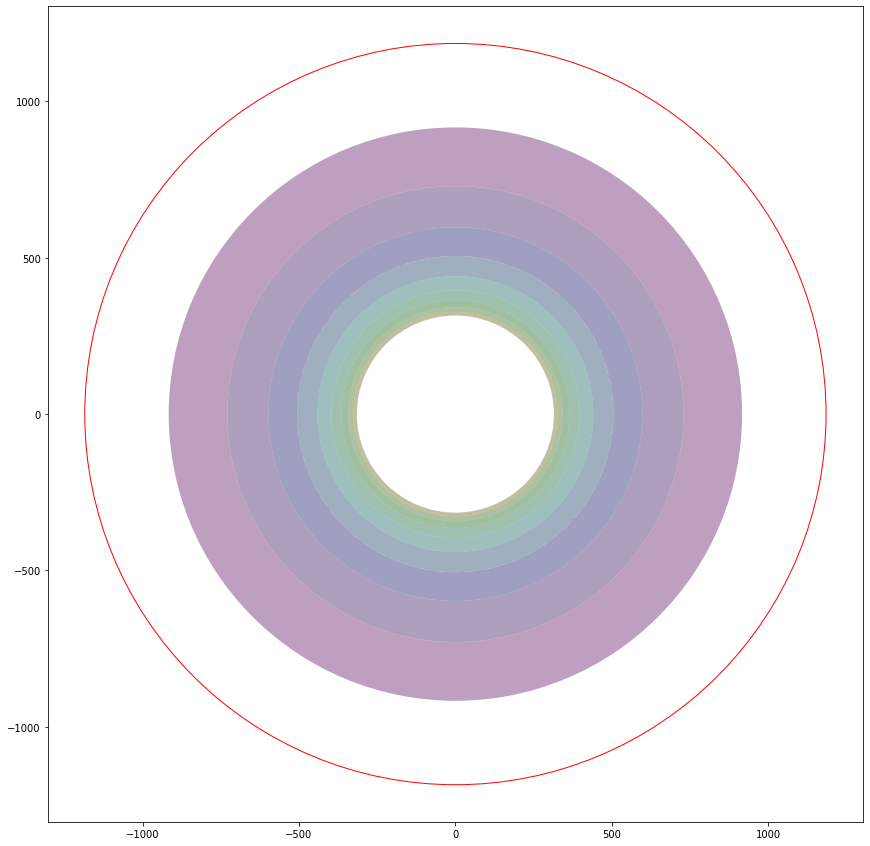

In [307]:
inner = plt.Circle((0, 0), 315, color='white', edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

plt.rcParams['figure.figsize'] = [15, 15]


#colors = ['red', 'green', 'blue', 'black']

zones = []
r_last = 315
for i, rad in enumerate(bv_sections['FBK_5fC']):
    if rad>315:
        zones.append(plt.Circle((0, 0), (rad+r_last)/2, fill=None, alpha=0.5, edgecolor=RGB_tuples[i], lw=(rad-r_last)/3.2))
        r_last = rad

for zone in zones:
    plt.gca().add_patch(zone)
    
    
plt.axis('scaled')
plt.show()

In [308]:
with open('layouts/database_new.yaml') as f:
    database_new = load(f, Loader=Loader)

disk_new = database_new['new']

In [309]:
new_layout = {}

s = Sensor(42.5, 22)

new_layout['D1'] = Dee(315, 1185)
new_layout['D1'].fromCenters(disk_new['disk1']['front'], s)

new_layout['D2'] = Dee(315, 1185)
new_layout['D2'].fromCenters(disk_new['disk1']['back'], s)

new_layout['D3'] = Dee(315, 1185)
new_layout['D3'].fromCenters(disk_new['disk2']['front'], s)

new_layout['D4'] = Dee(315, 1185)
new_layout['D4'].fromCenters(disk_new['disk2']['back'], s)

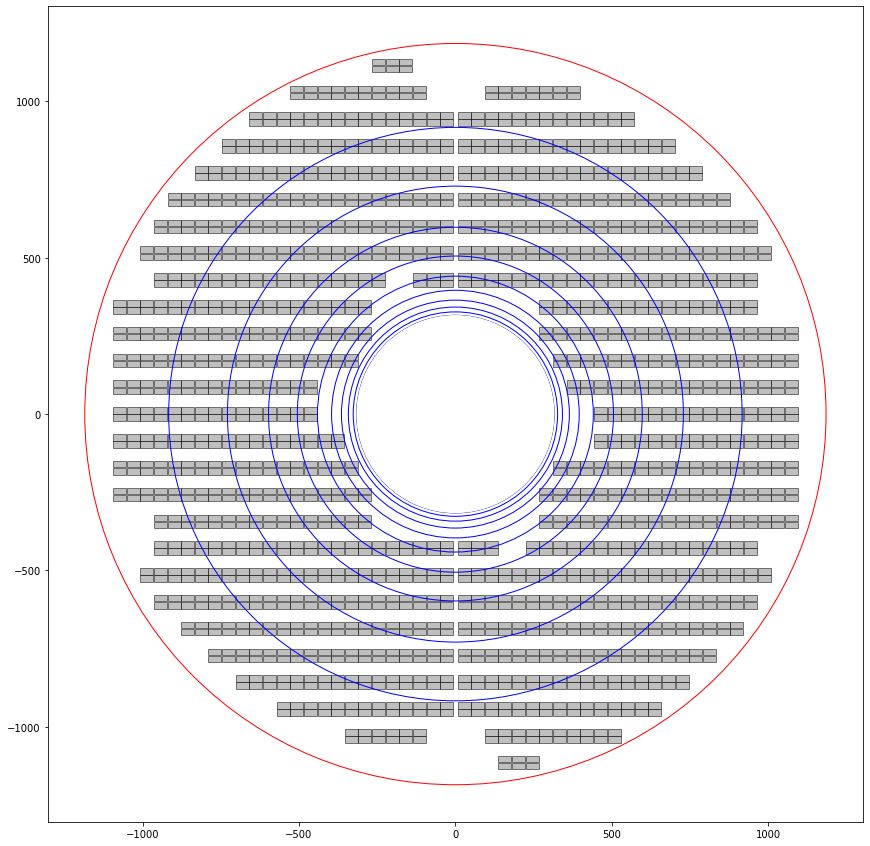

In [310]:
inner = plt.Circle((0, 0), 315, color='white')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

#plt.gca().add_patch(inner)
#plt.gca().add_patch(outer)

for SM in new_layout['D2'].supermodules:
    plt.gca().add_patch(SM.getPolygon())

if True:
    for dee in ['D2']:#new_layout:
        for sen in new_layout[dee].sensors:
            plt.gca().add_patch(sen.getPolygon(active=True))

if False:
    for slot in new_layout['D2'].slots_flat:
        if slot.covered:
            for mod in slot.modules:
                for sen in mod.sensors:
                    plt.gca().add_patch(sen.getPolygon(active=True))

zones = []
for i, rad in enumerate(bv_sections['FBK_5fC']):
    if rad>315:
        zones.append(plt.Circle((0, 0), rad, fill=None, edgecolor='b', alpha=1))
    
for zone in zones:
    plt.gca().add_patch(zone)
  
plt.gca().add_patch(inner)
plt.gca().add_patch(outer)


                    

#plt.savefig('test.pdf')
        
plt.axis('scaled')
plt.show()

In [311]:
d = new_layout['D2']

In [312]:
s = Sensor(42.5, 22)
m = Module(43.10, 56.50, n_sensor_x=1, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=42.5+0.1)

m.populate(s)

rb = ReadoutBoard(10,56.5, color='green')
pb = ReadoutBoard(10,29.5, color='red')

SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

flavors = [3,6,7]

In [313]:
pb.width

29.5

In [314]:
d.sensors[0]

In [315]:
x_centers = [ sens.x for sens in d.sensors ]
y_centers = []
for i, sens in enumerate(d.sensors):
    if sens.x>0:
        y_centers.append(sens.y)
#y_centers = [ sens.y for sens in d.sensors ]

In [316]:
y_positions_individual = set(y_centers)

In [317]:
y_counts = []
for y in reversed(sorted(y_positions_individual)):
    y_counts.append((y, int(y_centers.count(y))))
    
count_vector = y_counts[::2]
count_vector

[(1039.65, 7),
 (953.95, 13),
 (868.25, 16),
 (782.55, 18),
 (696.85, 20),
 (611.15, 22),
 (525.45, 23),
 (439.75, 22),
 (354.05, 16),
 (268.35, 19),
 (182.65, 18),
 (96.95, 17),
 (11.25, 15),
 (-74.45, 15),
 (-160.15, 18),
 (-245.85000000000002, 19),
 (-331.55, 19),
 (-417.25, 20),
 (-502.95000000000005, 23),
 (-588.65, 22),
 (-674.35, 21),
 (-760.05, 19),
 (-845.75, 17),
 (-931.45, 15),
 (-1017.1500000000001, 10),
 (-1102.85, 3)]

In [318]:
partitions = []
for module_count in count_vector:
    partitions.append((module_count[0], getPartition(module_count[1], flavors=[3,6,7])))
    
partitions

[(1039.65, [7]),
 (953.95, [7, 6]),
 (868.25, [7, 6, 3]),
 (782.55, [6, 6, 6]),
 (696.85, [7, 7, 6]),
 (611.15, [7, 6, 6, 3]),
 (525.45, [7, 7, 6, 3]),
 (439.75, [7, 6, 6, 3]),
 (354.05, [7, 6, 3]),
 (268.35, [7, 6, 6]),
 (182.65, [6, 6, 6]),
 (96.95, [7, 7, 3]),
 (11.25, [6, 6, 3]),
 (-74.45, [6, 6, 3]),
 (-160.15, [6, 6, 6]),
 (-245.85000000000002, [7, 6, 6]),
 (-331.55, [7, 6, 6]),
 (-417.25, [7, 7, 6]),
 (-502.95000000000005, [7, 7, 6, 3]),
 (-588.65, [7, 6, 6, 3]),
 (-674.35, [7, 7, 7]),
 (-760.05, [7, 6, 6]),
 (-845.75, [7, 7, 3]),
 (-931.45, [6, 6, 3]),
 (-1017.1500000000001, [7, 3]),
 (-1102.85, [3])]

In [319]:
mod_partitions = []

for part in partitions:
    if abs(part[0])<500:
        if part[1][-1] == 6:
            new_part = part[1][:-1] + [3,3]
        else:
            new_part = part[1]
    else:
        new_part = part[1]
    if len(new_part)>0:
        mod_partitions.append((part[0], len(new_part), new_part))
    
mod_partitions

[(1039.65, 1, [7]),
 (953.95, 2, [7, 6]),
 (868.25, 3, [7, 6, 3]),
 (782.55, 3, [6, 6, 6]),
 (696.85, 3, [7, 7, 6]),
 (611.15, 4, [7, 6, 6, 3]),
 (525.45, 4, [7, 7, 6, 3]),
 (439.75, 4, [7, 6, 6, 3]),
 (354.05, 3, [7, 6, 3]),
 (268.35, 4, [7, 6, 3, 3]),
 (182.65, 4, [6, 6, 3, 3]),
 (96.95, 3, [7, 7, 3]),
 (11.25, 3, [6, 6, 3]),
 (-74.45, 3, [6, 6, 3]),
 (-160.15, 4, [6, 6, 3, 3]),
 (-245.85000000000002, 4, [7, 6, 3, 3]),
 (-331.55, 4, [7, 6, 3, 3]),
 (-417.25, 4, [7, 7, 3, 3]),
 (-502.95000000000005, 4, [7, 7, 6, 3]),
 (-588.65, 4, [7, 6, 6, 3]),
 (-674.35, 3, [7, 7, 7]),
 (-760.05, 3, [7, 6, 6]),
 (-845.75, 3, [7, 7, 3]),
 (-931.45, 3, [6, 6, 3]),
 (-1017.1500000000001, 2, [7, 3]),
 (-1102.85, 1, [3])]

In [320]:
new_layout['D1'].populate(SM, flavors=flavors, center_RB=True)  # this is not working
new_layout['D2'].populate(SM, flavors=flavors, center_RB=True)  # this is not working

In [327]:
n_readout_boards = {3:0, 6:0, 7:0}
n_modules = 0

for face in ['D1', 'D2', 'D3', 'D4']:
    y_centers = []
    for i, sens in enumerate(d.sensors):
        if sens.x>0:
            y_centers.append(sens.y)
        y_positions_individual = set(y_centers)
    y_counts = []
    for y in reversed(sorted(y_positions_individual)):
        y_counts.append((y, int(y_centers.count(y))))

    count_vector = y_counts[::2]
    partitions = []
    for module_count in count_vector:
        #print (module_count)
        n_modules += module_count[1]
        partitions.append((module_count[0], getPartition(module_count[1], flavors=[3,6,7])))
        
    mod_partitions = []

    for part in partitions:
        
        if abs(part[0])<500:
            if part[1][-1] == 6:
                new_part = part[1][:-1] + [3,3]
            elif part[1][-2] == 6 and part[1][-1] == 3 and abs(part[0])>400:
                new_part = part[1][:-2] + [3,3,3]
            else:
                new_part = part[1]
        else:
            new_part = part[1]
        if len(new_part)>0:
            mod_partitions.append((part[0], len(new_part), new_part))
            n_readout_boards[3] += new_part.count(3)*4  # multiply with 4 for full face (mirrored) + second endcap
            n_readout_boards[6] += new_part.count(6)*4
            n_readout_boards[7] += new_part.count(7)*4

n_readout_boards

{3: 448, 6: 464, 7: 432}

In [273]:
336 + 456 + 480

1272

In [323]:
448 + 464 + 432

1344

In [330]:
n_modules * 4 *4

28608

In [274]:
import numpy as np

In [275]:
d = new_layout['D2']

In [276]:
centers = [ (sens.x, sens.y) for sens in d.sensors if sens.x>0 ]
#y_centers = [ sens.y for sens in d.sensors if sens.x>0 ]

In [277]:
centers.sort(key=lambda y: y[1], reverse=True)
centers;

In [278]:
y_centers = []
for i, sens in enumerate(d.sensors):
    if sens.x>0:
        y_centers.append(sens.y)

#y_centers = [ sens.y for sens in d.sensors ]
y_centers.sort(reverse=True)
y_centers;

In [279]:
y_positions_individual = set(y_centers)
y_positions_individual = list(y_positions_individual)
y_positions_individual.sort(reverse=True)
y_positions_individual;

In [280]:
y_centers_module = (np.array(y_positions_individual[0::2]) + np.array(y_positions_individual[1::2]))/2
#list(y_centers_module).index(557.05)
y_centers_module;

In [281]:
x_centers_module = {y:[] for y in y_centers_module}
for x, y in centers:
    if y in y_positions_individual[0::2]:
        i = list(y_positions_individual[0::2]).index(y)
        x_centers_module[y_centers_module[i]].append(x)
x_centers_module;

In [283]:
for face in ['D2']:
    y_centers = []
    for i, sens in enumerate(d.sensors):
        if sens.x>0:
            y_centers.append(sens.y)
            
    #y_centers = [ sens.y for sens in new_layout[face].sensors ]
    y_positions_individual = set(y_centers)
    y_counts = []
    for y in reversed(sorted(y_positions_individual)):
        y_counts.append((y, int(y_centers.count(y))))

    count_vector = y_counts[::2]
    partitions = []
    for module_count in count_vector:
        partitions.append((module_count[0], getPartition(module_count[1], flavors=[3,6,7])))
        
    mod_partitions = []

    for part in partitions:
        if abs(part[0])<500:
            if part[1][-1] == 6:
                new_part = part[1][:-1] + [3,3]
            elif part[1][-2] == 6 and part[1][-1] == 3 and abs(part[0])>400:
                new_part = part[1][:-2] + [3,3,3]
            else:
                new_part = part[1]
        else:
            new_part = part[1]
        if len(new_part)>0:
            mod_partitions.append((part[0], len(new_part), new_part))


In [284]:
partitions

[(1039.65, [7]),
 (953.95, [7, 6]),
 (868.25, [7, 6, 3]),
 (782.55, [6, 6, 6]),
 (696.85, [7, 7, 6]),
 (611.15, [7, 6, 6, 3]),
 (525.45, [7, 7, 6, 3]),
 (439.75, [7, 6, 6, 3]),
 (354.05, [7, 6, 3]),
 (268.35, [7, 6, 6]),
 (182.65, [6, 6, 6]),
 (96.95, [7, 7, 3]),
 (11.25, [6, 6, 3]),
 (-74.45, [6, 6, 3]),
 (-160.15, [6, 6, 6]),
 (-245.85000000000002, [7, 6, 6]),
 (-331.55, [7, 6, 6]),
 (-417.25, [7, 7, 6]),
 (-502.95000000000005, [7, 7, 6, 3]),
 (-588.65, [7, 6, 6, 3]),
 (-674.35, [7, 7, 7]),
 (-760.05, [7, 6, 6]),
 (-845.75, [7, 7, 3]),
 (-931.45, [6, 6, 3]),
 (-1017.1500000000001, [7, 3]),
 (-1102.85, [3])]

In [291]:
supermodules = []
for i, y in enumerate(x_centers_module.keys()):
    _, __, partition = mod_partitions[i]
    start = 0
    for n_mod in reversed(partition):
        tmp = copy.deepcopy(SuperModule.fromSuperModule(SM, n_modules=n_mod, module_gap=SM.module_gap, orientation=SM.orientation, color=colors[n_mod]))
        x = sum(x_centers_module[y][start:start+n_mod])/n_mod
        tmp.move_by(x, y+pb.width/2) ## switch between + and - for D1/D2
        start += n_mod
        supermodules.append(tmp)

In [292]:
new_layout['D2'].sensors[0].x

158.35

In [293]:
bv_sections[sensor_type]

[302.70399546454166,
 320.5478211571105,
 339.9432838664244,
 361.0253085504612,
 383.9405527722404,
 408.8484269263482,
 435.9222031808132,
 465.35022084870997,
 497.3371965746847,
 532.1056484507442,
 569.8974439682003,
 610.9754825741306,
 655.6255245370985,
 704.1581788446723,
 756.9110639616002,
 814.2511564800002,
 876.577344,
 944.3232,
 1017.96,
 1098.0]

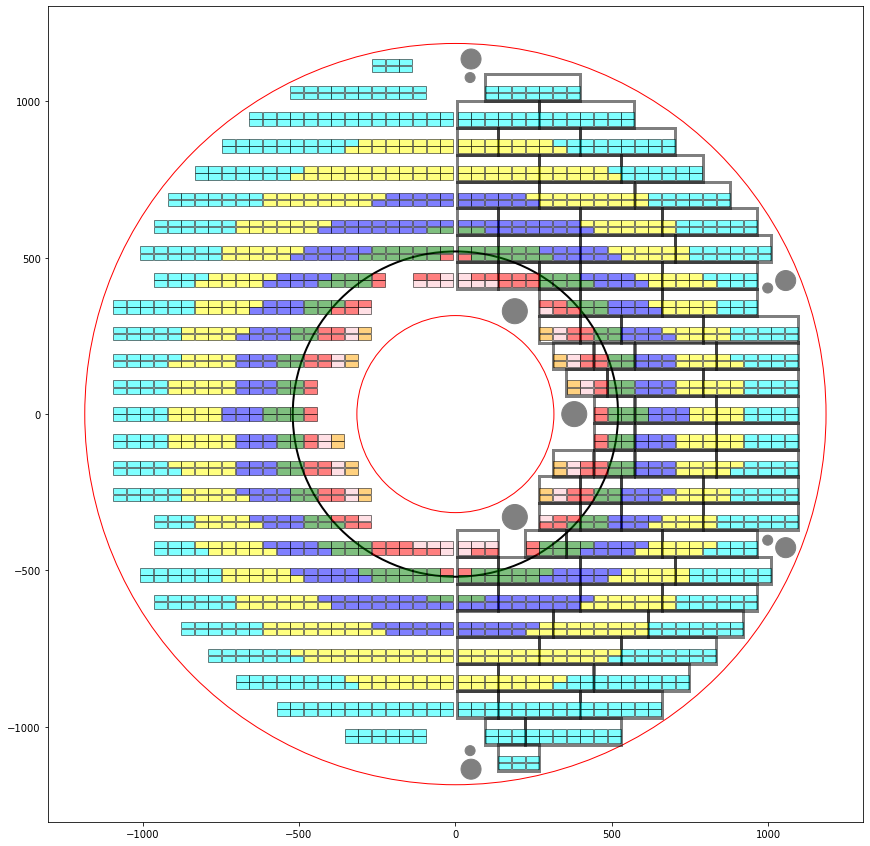

In [294]:
SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

face = 'D2'
sensor_type = 'FBK_5fC'

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
rad_boarder = plt.Circle((0, 0), 520,fill=None, edgecolor='black', linewidth=2)
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')


plt.rcParams['figure.figsize'] = [15, 15]

#f_in = uproot.open("data/BV/disks_new.root")
#h = f_in["HPK_5fC"].to_hist()
#h.plot(cmap="binary")

plt.gca().add_patch(inner)
plt.gca().add_patch(rad_boarder)
plt.gca().add_patch(outer)
#plt.gca().add_patch(center)

for SM in supermodules:
    plt.gca().add_patch(SM.getPolygon(alpha=0.5, fill=False))

if True:
    for dee in [face]:#new_layout:
        for sen in new_layout[dee].sensors:
            r = (sen.x**2 + sen.y**2)**(0.5)
            #print (r)
            for i, rad in enumerate(bv_sections[sensor_type] + [1185]):
                if r<rad:
                    #color = RGB_tuples[i]
                    color = colors[i]
                    #print (color)
                    break
            #sen.color = color
            plt.gca().add_patch(sen.getPolygon(active=True, alpha=0.5, color=color))
    
#plt.plot((-1185, 1185), (0, 0), c='blue')
#plt.plot((0, 0), (-1185, 1185), c='blue')

holes = []
holes.append(plt.Circle((190, -329), 40,color='gray'))
holes.append(plt.Circle((190, 329), 40,color='gray'))
holes.append(plt.Circle((380, 0), 40,color='gray'))

holes.append(plt.Circle((50, 1135.3), 32,color='gray'))
holes.append(plt.Circle((47, 1076), 16,color='gray'))

holes.append(plt.Circle((50, -1135.3), 32,color='gray'))
holes.append(plt.Circle((47, -1076), 16,color='gray'))

holes.append(plt.Circle((998.5, 403.15), 16,color='gray'))
holes.append(plt.Circle((1056, 427), 32,color='gray'))

holes.append(plt.Circle((998.5, -403.15), 16,color='gray'))
holes.append(plt.Circle((1056, -427), 32,color='gray'))


for hole in holes:
    plt.gca().add_patch(hole)

    
zones = []
for i, rad in enumerate(bv_sections[sensor_type]):
    if rad>315:
        zones.append(plt.Circle((0, 0), rad, fill=None, edgecolor='b', alpha=1))
    
#for zone in zones:
#    plt.gca().add_patch(zone)
    
plt.axis('scaled')
plt.show()

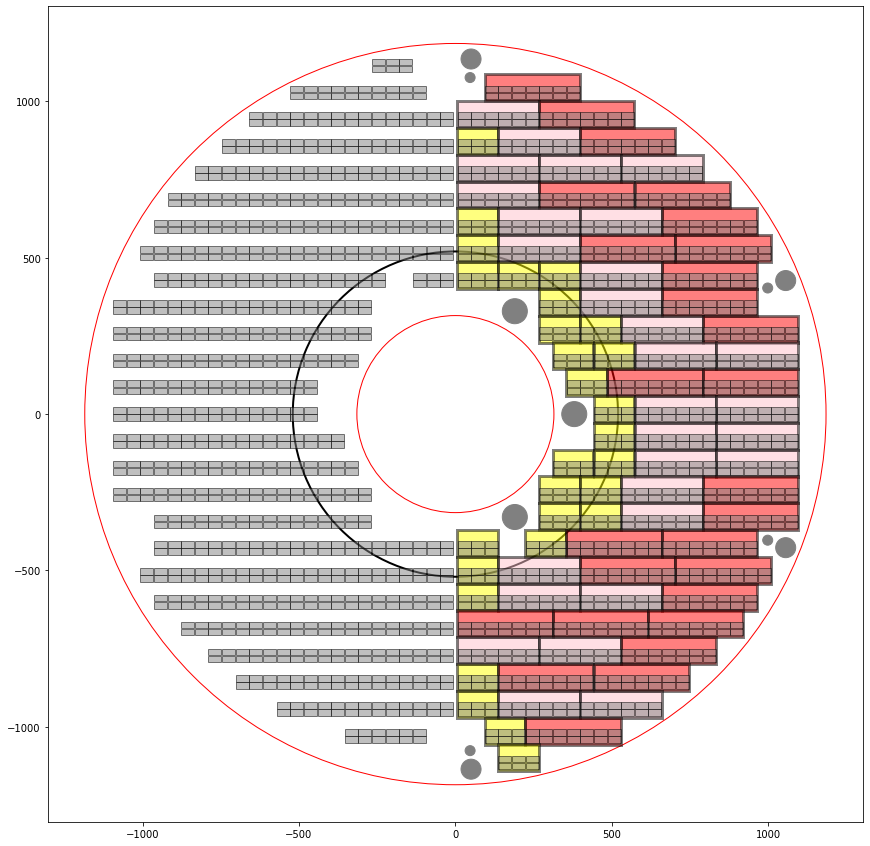

In [295]:
SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

face = 'D2'
sensor_type = 'FBK_5fC'

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
rad_boarder = plt.Circle((0, 0), 520,fill=None, edgecolor='black', linewidth=2)
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')


plt.rcParams['figure.figsize'] = [15, 15]

#f_in = uproot.open("data/BV/disks_new.root")
#h = f_in["HPK_5fC"].to_hist()
#h.plot(cmap="binary")

plt.gca().add_patch(inner)
plt.gca().add_patch(rad_boarder)
plt.gca().add_patch(outer)
#plt.gca().add_patch(center)

for SM in supermodules:
    plt.gca().add_patch(SM.getPolygon(alpha=0.5))

if True:
    for dee in [face]:#new_layout:
        for sen in new_layout[dee].sensors:
            plt.gca().add_patch(sen.getPolygon(active=True, alpha=0.5))

holes = []
holes.append(plt.Circle((190, -329), 40,color='gray'))
holes.append(plt.Circle((190, 329), 40,color='gray'))
holes.append(plt.Circle((380, 0), 40,color='gray'))

holes.append(plt.Circle((50, 1135.3), 32,color='gray'))
holes.append(plt.Circle((47, 1076), 16,color='gray'))

holes.append(plt.Circle((50, -1135.3), 32,color='gray'))
holes.append(plt.Circle((47, -1076), 16,color='gray'))

holes.append(plt.Circle((998.5, 403.15), 16,color='gray'))
holes.append(plt.Circle((1056, 427), 32,color='gray'))

holes.append(plt.Circle((998.5, -403.15), 16,color='gray'))
holes.append(plt.Circle((1056, -427), 32,color='gray'))


for hole in holes:
    plt.gca().add_patch(hole)
    
plt.axis('scaled')
plt.show()

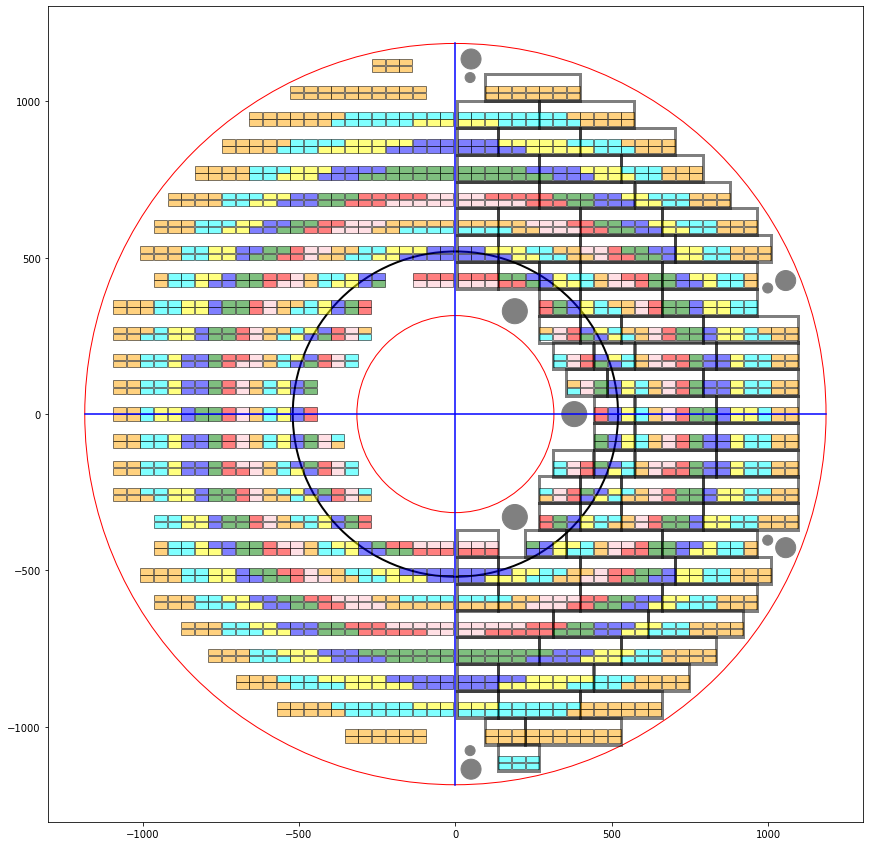

In [296]:
SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

face = 'D2'
sensor_type = 'HPK_5fC'

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
rad_boarder = plt.Circle((0, 0), 520,fill=None, edgecolor='black', linewidth=2)
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')


plt.rcParams['figure.figsize'] = [15, 15]

#f_in = uproot.open("data/BV/disks_new.root")
#h = f_in["HPK_5fC"].to_hist()
#h.plot(cmap="binary")

plt.gca().add_patch(inner)
plt.gca().add_patch(rad_boarder)
plt.gca().add_patch(outer)
#plt.gca().add_patch(center)

for SM in supermodules:
    plt.gca().add_patch(SM.getPolygon(alpha=0.5, fill=False))

if True:
    for dee in [face]:#new_layout:
        for sen in new_layout[dee].sensors:
            r = (sen.x**2 + sen.y**2)**(0.5)
            #print (r)
            for i, rad in enumerate(bv_sections[sensor_type]):
                if r<rad:
                    #color = RGB_tuples[i]
                    color = colors[i]
                    #print (color)
                    break
            #sen.color = color
            plt.gca().add_patch(sen.getPolygon(active=True, alpha=0.5, color=color))
    
plt.plot((-1185, 1185), (0, 0), c='blue')
plt.plot((0, 0), (-1185, 1185), c='blue')

holes = []
holes.append(plt.Circle((190, -329), 40,color='gray'))
holes.append(plt.Circle((190, 329), 40,color='gray'))
holes.append(plt.Circle((380, 0), 40,color='gray'))

holes.append(plt.Circle((50, 1135.3), 32,color='gray'))
holes.append(plt.Circle((47, 1076), 16,color='gray'))

holes.append(plt.Circle((50, -1135.3), 32,color='gray'))
holes.append(plt.Circle((47, -1076), 16,color='gray'))

holes.append(plt.Circle((998.5, 403.15), 16,color='gray'))
holes.append(plt.Circle((1056, 427), 32,color='gray'))

holes.append(plt.Circle((998.5, -403.15), 16,color='gray'))
holes.append(plt.Circle((1056, -427), 32,color='gray'))


for hole in holes:
    plt.gca().add_patch(hole)

    
zones = []
for i, rad in enumerate(bv_sections[sensor_type]):
    if rad>315:
        zones.append(plt.Circle((0, 0), rad, fill=None, edgecolor='b', alpha=1))
    
#for zone in zones:
#    plt.gca().add_patch(zone)
    
plt.axis('scaled')
plt.show()

In [297]:
SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
rad_boarder = plt.Circle((0, 0), 520,fill=None, edgecolor='b')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')


plt.rcParams['figure.figsize'] = [15, 15]

f_in = uproot.open("data/BV/disks_new.root")
h = f_in["HPK_5fC"].to_hist()
h.plot(cmap="binary")

plt.gca().add_patch(inner)
plt.gca().add_patch(rad_boarder)
plt.gca().add_patch(outer)
#plt.gca().add_patch(center)

for SM in supermodules:
    plt.gca().add_patch(SM.getPolygon(alpha=0.1))

if True:
    for dee in ['D2']:#new_layout:
        for sen in new_layout[dee].sensors:
            plt.gca().add_patch(sen.getPolygon(active=True, alpha=0.2))
    
plt.plot((-1185, 1185), (0, 0))
plt.plot((0, 0), (-1185, 1185))

plt.axis('scaled')
plt.show()

NameError: name 'uproot' is not defined

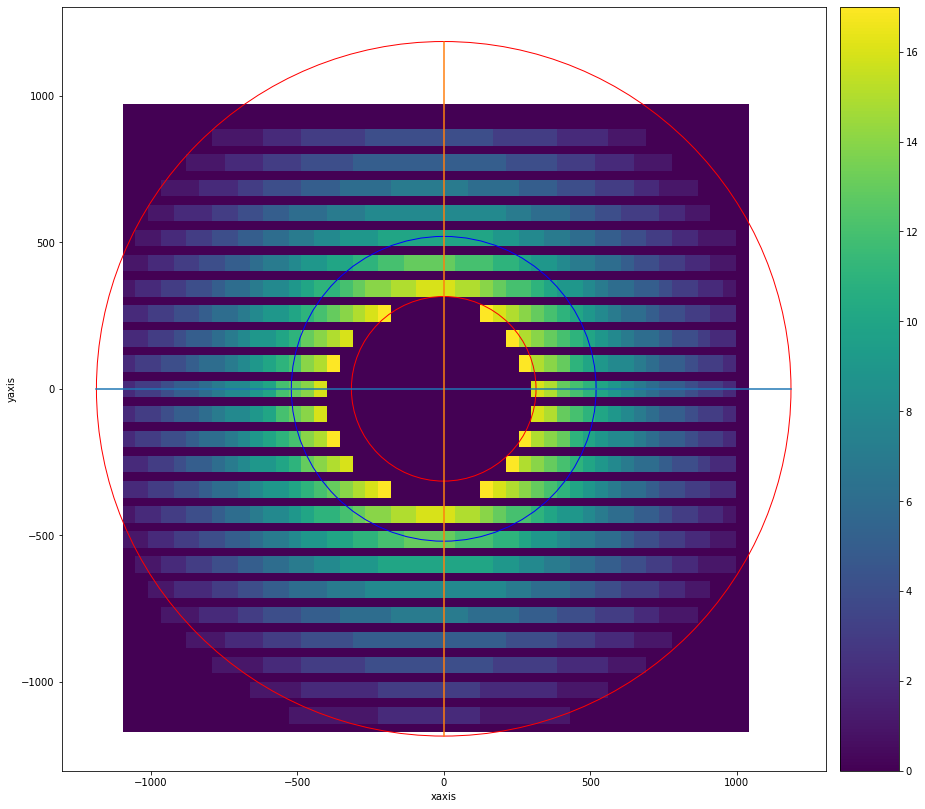

In [167]:
SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
rad_boarder = plt.Circle((0, 0), 520,fill=None, edgecolor='b')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')


plt.rcParams['figure.figsize'] = [15, 15]

f_in = uproot.open("data/BV/disks_new.root")
h = f_in["HPK_5fC"].to_hist()
h.plot()

plt.gca().add_patch(inner)
plt.gca().add_patch(rad_boarder)
plt.gca().add_patch(outer)
#plt.gca().add_patch(center)

    
plt.plot((-1185, 1185), (0, 0))
plt.plot((0, 0), (-1185, 1185))

plt.axis('scaled')
plt.show()

In [29]:
n_mod

7

In [30]:
supermodules = []

for n, _, partition in mod_partitions:
    for k, n_mod in enumerate(partition):
        tmp = copy.deepcopy(SuperModule.fromSuperModule(SM, n_modules=n_mod, module_gap=SM.module_gap, orientation=SM.orientation, color=colors[n_mod]))
        tmp.move_by(self.slots[i][0].x1-tmp.x1, self.slots[i][0].y1-tmp.y1)
        x_shift += tmp.height + tmp.module_gap
        supermodules.append(tmp)


NameError: name 'self' is not defined

In [150]:
import uproot

In [38]:
# File from here: /home/users/dspitzba/TOP/CMSSW_10_6_27/src/disks_new.root

f_in = uproot.open("data/BV/disks_new.root")

In [39]:
f_in.keys()

['FBK_2.5fC;1', 'FBK_5fC;1', 'HPK_2.5fC;1', 'HPK_5fC;1']

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff42a3c0190>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ff42a3c07d0>, text=[])

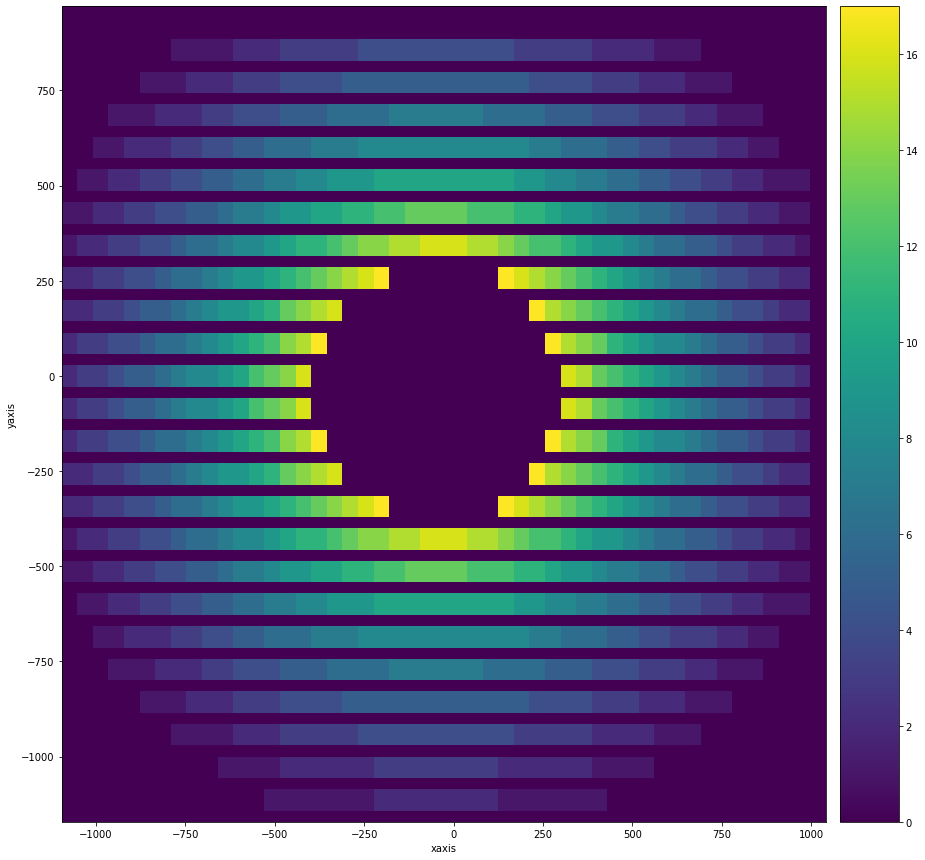

In [41]:
h = f_in["HPK_5fC"].to_hist()
h.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff42a7ecc50>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ff42a7fc290>, text=[])

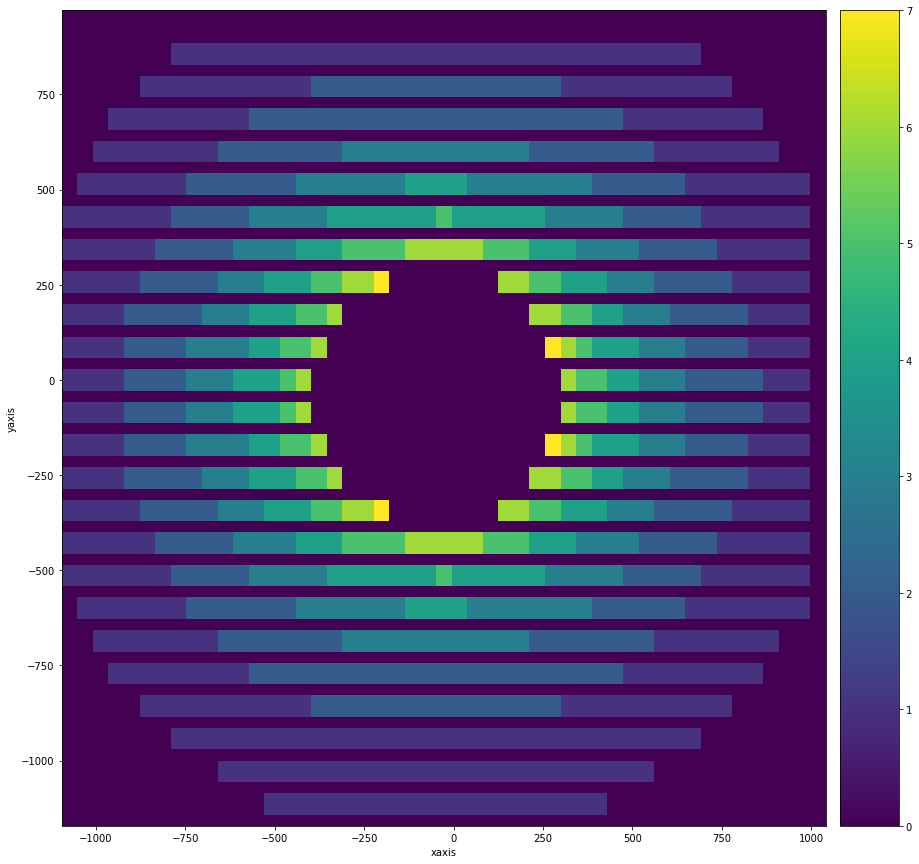

In [42]:
h = f_in["FBK_5fC"].to_hist()
h.plot()

In [36]:
h.values()[20,20]

0.0

In [37]:
x_axis = h.axes[0]

In [38]:
x_axis.value(0)

-1095.75

In [39]:
h.axes

(Variable(array([-1095.75      , -1052.15002441, -1008.55004883,  -964.95007324,
         -921.35009766,  -877.75012207,  -834.15014648,  -790.5501709 ,
         -746.95019531,  -703.35021973,  -659.75024414,  -616.15026855,
         -572.55029297,  -528.95031738,  -485.35031128,  -441.75030518,
         -398.15029907,  -354.55029297,  -310.95028687,  -267.35028076,
         -223.75027466,  -180.15026855,  -136.55026245,   -92.95026398,
          -49.3502655 ,    -5.75026703,    37.84973145,    81.44972992,
          125.04972839,   168.64971924,   212.24972534,   255.84973145,
          299.44973755,   343.04974365,   386.64974976,   430.24975586,
          473.84976196,   517.44976807,   561.04974365,   604.64971924,
          648.24969482,   691.84967041,   735.449646  ,   779.04962158,
          822.64959717,   866.24957275,   909.84954834,   953.44952393,
          997.04949951,  1040.64953613])),
 Variable(array([-1171.55004883, -1142.34997559, -1085.85009766, -1056.65002441,
   